<a target="_blank" href="https://colab.research.google.com/github/BrunoCapron/EQE358-metodos_numericos/blob/main/Capitulo_7_Res_EDOs/ProblemasStiff(Rigidos).ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# Exemplo de um Problema Stiff (Rígido)

Este notebook demonstra como o método de Euler Explícito pode falhar ao resolver EDOs stiff (rígidas), enquanto o método de Euler Implícito é estável mesmo com passos maiores.

O problema escolhido é:
$$
y' = -15y, \quad y(0) = 1
$$

Com solução exata:

$$ y(t) = e^{-15t} $$

Essa equação é **stiff (rígida)** porque a solução decai muito rapidamente. Um método explícito ingênuo requer passos de tempo muito pequenos para permanecer estável.

---

## 🧮 Métodos Numéricos

### 🔹 Euler Explícito:

$
y_{n+1} = y_n + h f(y_n) = y_n - 15h y_n = y_n (1 - 15h)
$

**Condição de estabilidade**:

$
|1 - 15h| < 1 \Rightarrow h < \frac{2}{15} \approx 0{,}133
$

> Passos maiores que $ h = 0{,}133 $ causam **divergência**.

**Condição de estabilidade sem oscilações**:

$
1 - 15h > 0 \Rightarrow h < \frac{1}{15} \approx 0{,}0667
$



> Para $ h > 0{,}0667 $, a solução do método de Euler Explícito começa a **oscilar**, pois os valores de $ y_n $ passam a alternar de sinal.

---

### 🔹 Euler Implícito:

$
y_{n+1} = y_n + h f(y_{n+1}) \Rightarrow y_{n+1} = y_n + h(-15 y_{n+1})
$

$
y_{n+1}(1 + 15h) = y_n \Rightarrow y_{n+1} = \frac{y_n}{1 + 15h}
$

> Este método é **estável incondicionalmente** para qualquer \( h > 0 \).


---



## Caso 1: Passo baixo (h = 0.05)

- O método de Euler Explícito permanece estável e sem oscilações.
- O método de Euler Implícito permanece estável e próximo da solução exata.

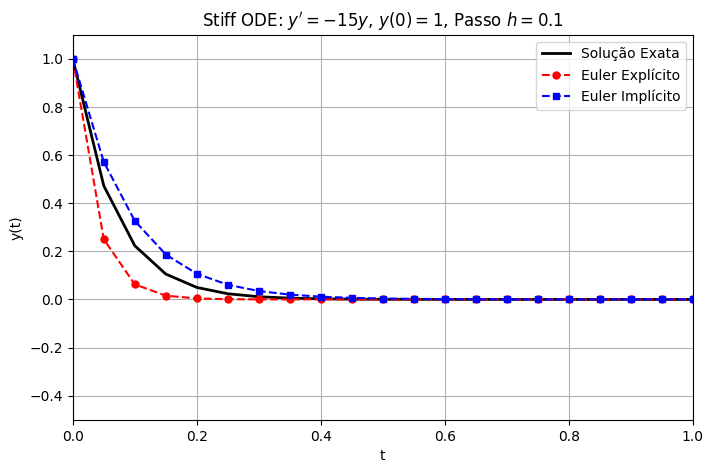

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Parâmetros do problema
h = 0.05
t_end = 1.0
t_values = np.arange(0, t_end + h, h)
exact_solution = np.exp(-15 * t_values)

# Soluções numéricas
explicit = [1.0]
implicit = [1.0]

for _ in range(1, len(t_values)):
    explicit.append(explicit[-1] * (1 - 15 * h))
    implicit.append(implicit[-1] / (1 + 15 * h))

# Criar figura
fig, ax = plt.subplots(figsize=(8, 5))
line_exact, = ax.plot([], [], 'k-', label="Solução Exata", linewidth=2)
line_explicit, = ax.plot([], [], 'r--o', label="Euler Explícito", markersize=5)
line_implicit, = ax.plot([], [], 'b--s', label="Euler Implícito", markersize=5)

ax.set_xlim(0, t_end)
ax.set_ylim(-0.5, 1.1)
ax.set_title("Stiff ODE: $y' = -15y$, $y(0)=1$, Passo $h=0.1$")
ax.set_xlabel("t")
ax.set_ylabel("y(t)")
ax.legend()
ax.grid(True)

# Função de atualização
def update(frame):
    line_exact.set_data(t_values[:frame], exact_solution[:frame])
    line_explicit.set_data(t_values[:frame], explicit[:frame])
    line_implicit.set_data(t_values[:frame], implicit[:frame])
    return line_exact, line_explicit, line_implicit

ani = animation.FuncAnimation(fig, update, frames=len(t_values)+1, interval=400, blit=True)
HTML(ani.to_jshtml())

## Caso 2: Passo moderado (h = 0.1)

- O método de Euler Explícito começa a oscilar, mas ainda não diverge.
- O método de Euler Implícito permanece estável e próximo da solução exata.

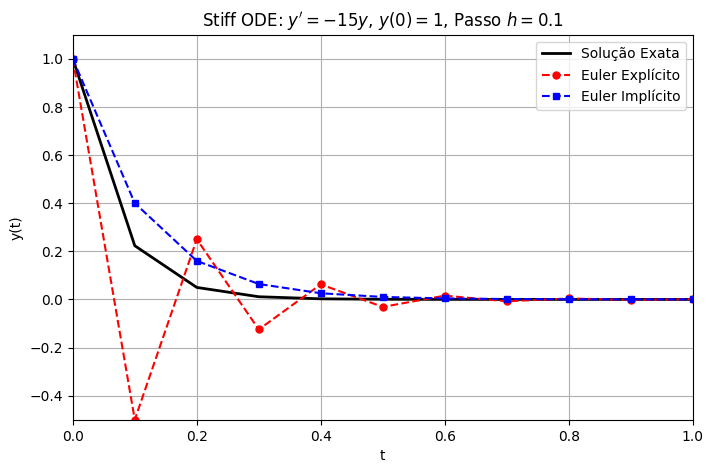

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Parâmetros do problema
h = 0.1
t_end = 1.0
t_values = np.arange(0, t_end + h, h)
exact_solution = np.exp(-15 * t_values)

# Soluções numéricas
explicit = [1.0]
implicit = [1.0]

for _ in range(1, len(t_values)):
    explicit.append(explicit[-1] * (1 - 15 * h))
    implicit.append(implicit[-1] / (1 + 15 * h))

# Criar figura
fig, ax = plt.subplots(figsize=(8, 5))
line_exact, = ax.plot([], [], 'k-', label="Solução Exata", linewidth=2)
line_explicit, = ax.plot([], [], 'r--o', label="Euler Explícito", markersize=5)
line_implicit, = ax.plot([], [], 'b--s', label="Euler Implícito", markersize=5)

ax.set_xlim(0, t_end)
ax.set_ylim(-0.5, 1.1)
ax.set_title("Stiff ODE: $y' = -15y$, $y(0)=1$, Passo $h=0.1$")
ax.set_xlabel("t")
ax.set_ylabel("y(t)")
ax.legend()
ax.grid(True)

# Função de atualização
def update(frame):
    line_exact.set_data(t_values[:frame], exact_solution[:frame])
    line_explicit.set_data(t_values[:frame], explicit[:frame])
    line_implicit.set_data(t_values[:frame], implicit[:frame])
    return line_exact, line_explicit, line_implicit

ani = animation.FuncAnimation(fig, update, frames=len(t_values)+1, interval=400, blit=True)
HTML(ani.to_jshtml())

---
## Caso 2: Passo maior (h = 0.2)

- O método de Euler Explícito agora diverge fortemente.
- O método de Euler Implícito continua estável.


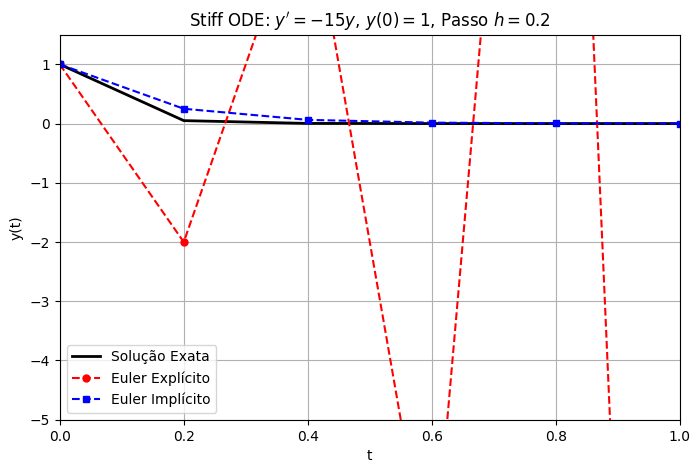

In [10]:
# Parâmetros para passo maior
h = 0.2
t_values = np.arange(0, t_end + h, h)
exact_solution = np.exp(-15 * t_values)

# Soluções numéricas com passo maior
explicit = [1.0]
implicit = [1.0]

for _ in range(1, len(t_values)):
    explicit.append(explicit[-1] * (1 - 15 * h))
    implicit.append(implicit[-1] / (1 + 15 * h))

# Nova figura
fig, ax = plt.subplots(figsize=(8, 5))
line_exact, = ax.plot([], [], 'k-', label="Solução Exata", linewidth=2)
line_explicit, = ax.plot([], [], 'r--o', label="Euler Explícito", markersize=5)
line_implicit, = ax.plot([], [], 'b--s', label="Euler Implícito", markersize=5)

ax.set_xlim(0, t_end)
ax.set_ylim(-5, 1.5)
ax.set_title("Stiff ODE: $y' = -15y$, $y(0)=1$, Passo $h=0.2$")
ax.set_xlabel("t")
ax.set_ylabel("y(t)")
ax.legend()
ax.grid(True)

# Função de atualização
def update_large(frame):
    line_exact.set_data(t_values[:frame], exact_solution[:frame])
    line_explicit.set_data(t_values[:frame], explicit[:frame])
    line_implicit.set_data(t_values[:frame], implicit[:frame])
    return line_exact, line_explicit, line_implicit

ani = animation.FuncAnimation(fig, update_large, frames=len(t_values)+1, interval=400, blit=True)
HTML(ani.to_jshtml())
